<a href="https://colab.research.google.com/github/crux007/crux007/blob/main/house_prices_analysis_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("googledrive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("googledrive")

# New section

In [2]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



In [5]:
train_data <- read.csv("/msc_training_dataset.csv")

In [6]:
test_data <- read.csv("/msc_testing_dataset.csv")

In [7]:
head(train_data)

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,3,1,2,1,1,0,1,0,0,1,1,6835
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,5,2,2,2,1,0,0,0,0,1,1,9005
4,1,2,1,2,0,0,0,0,1,1,0,5105
5,2,1,2,3,1,1,0,0,1,1,0,9105
6,5,1,2,1,0,0,1,0,1,0,0,8995


In [8]:
str(train_data)

'data.frame':	3000 obs. of  12 variables:
 $ room        : int  3 5 5 1 2 5 3 1 5 3 ...
 $ bathroom    : int  1 2 2 2 1 1 1 1 1 1 ...
 $ kitchen     : int  2 2 2 1 2 2 1 1 1 1 ...
 $ french_door : int  1 2 2 2 3 1 3 1 2 2 ...
 $ backyard    : int  1 1 1 0 1 0 1 0 0 0 ...
 $ furnished   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ green_paint : int  1 0 0 0 0 1 0 0 0 0 ...
 $ solar_power : int  0 0 0 0 0 0 1 1 1 0 ...
 $ woodfloor   : int  0 0 0 1 1 1 0 0 1 1 ...
 $ qlm_security: int  1 1 1 1 1 0 0 1 0 0 ...
 $ club_access : int  1 1 1 0 0 0 0 1 0 0 ...
 $ price       : int  6835 9005 9005 5105 9105 8995 6805 4935 9895 6365 ...


In [9]:
summary(train_data)

      room         bathroom        kitchen       french_door   
 Min.   :1.00   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.00   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Median :3.00   Median :1.000   Median :2.000   Median :2.000  
 Mean   :2.99   Mean   :1.489   Mean   :1.522   Mean   :1.998  
 3rd Qu.:4.00   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:3.000  
 Max.   :5.00   Max.   :2.000   Max.   :2.000   Max.   :3.000  
    backyard        furnished       green_paint     solar_power    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.000   Median :0.0000  
 Mean   :0.4903   Mean   :0.4887   Mean   :0.485   Mean   :0.4957  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
   woodfloor       qlm_security     club_access         price      
 Min.   

In [10]:
min(train_data$price)

[1] 2235

In [11]:
max(train_data$price)

[1] 15035

In [31]:
library(ggplot2)


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin




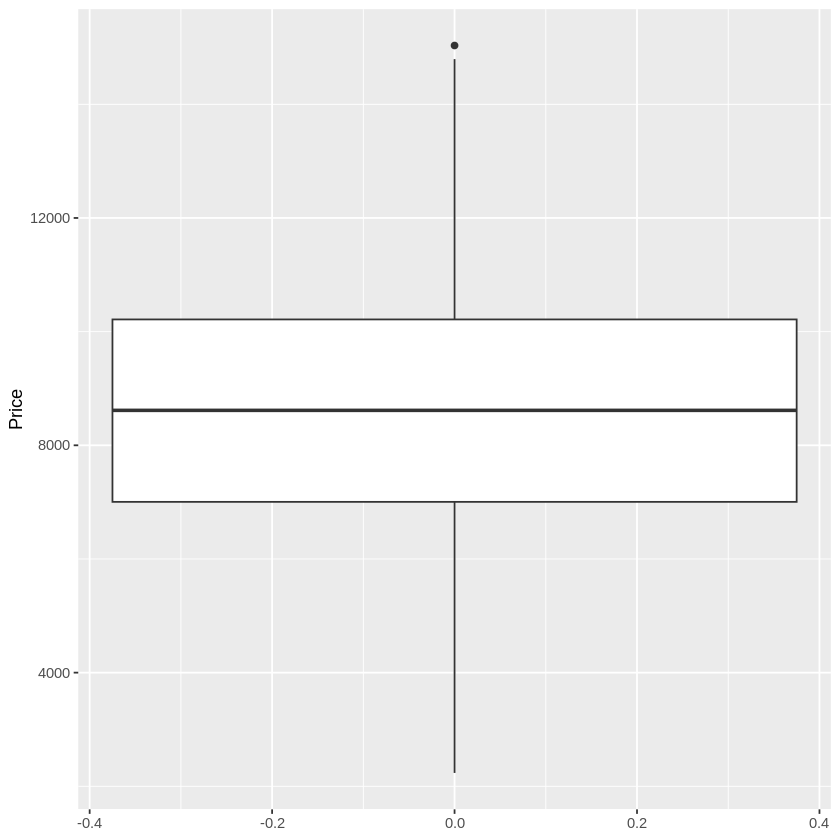

In [32]:
ggplot(train_data, aes(y = price)) +
  geom_boxplot()+
  ylab("Price")

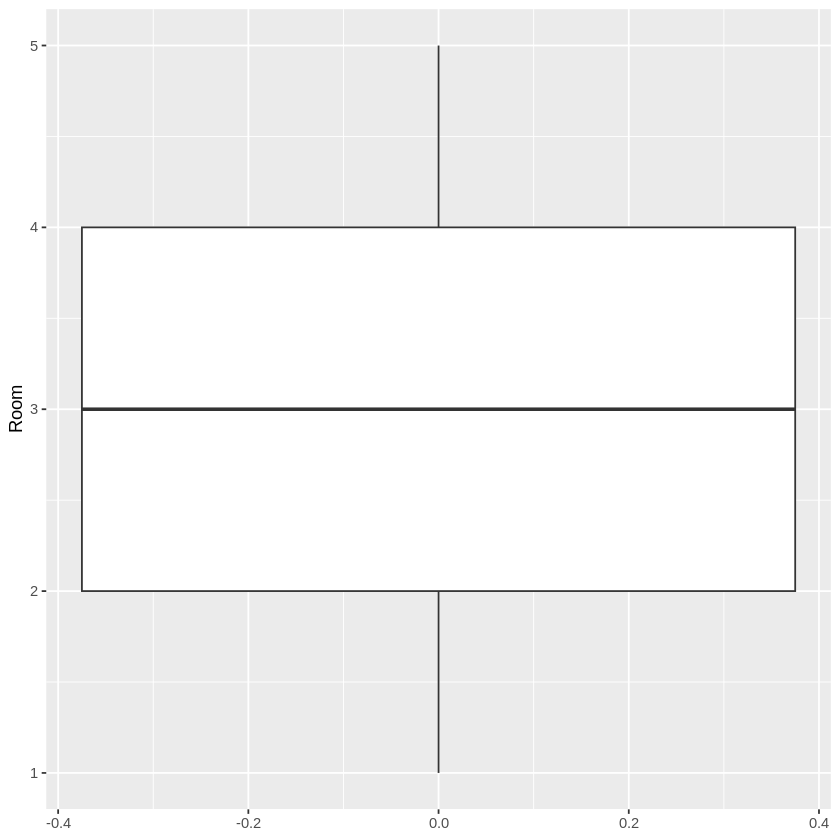

In [33]:
ggplot(train_data, aes(y = room)) +
  geom_boxplot()+
  ylab("Room")

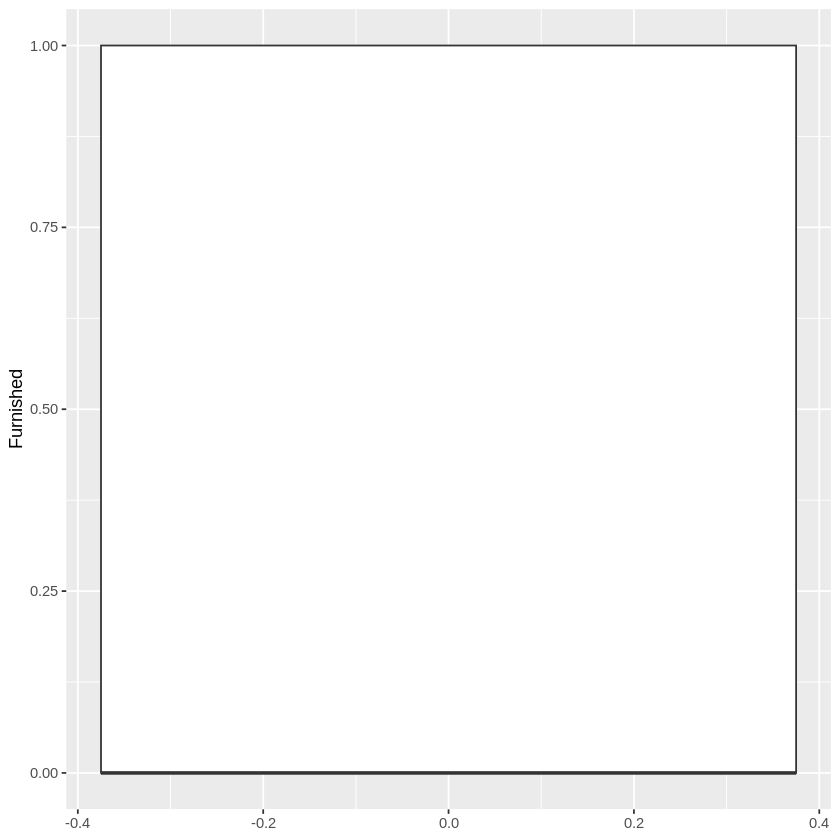

In [34]:
ggplot(train_data, aes(y = furnished)) +
  geom_boxplot()+
  ylab("Furnished")

In [12]:
train_predictors <- train_data[, -ncol(train_data)]

In [13]:
train_target <- train_data$price

In [14]:
test_predictors <- test_data[, -ncol(test_data)]

In [15]:
test_target <- test_data$price

In [16]:
set.seed(123)

mtry = 3  OOB error = 157015.1 
Searching left ...
mtry = 2 	OOB error = 563033.1 
-2.585852 0.01 
Searching right ...
mtry = 4 	OOB error = 77826.06 
0.5043404 0.01 
mtry = 6 	OOB error = 62645.93 
0.195052 0.01 
mtry = 9 	OOB error = 66084.53 
-0.05488942 0.01 


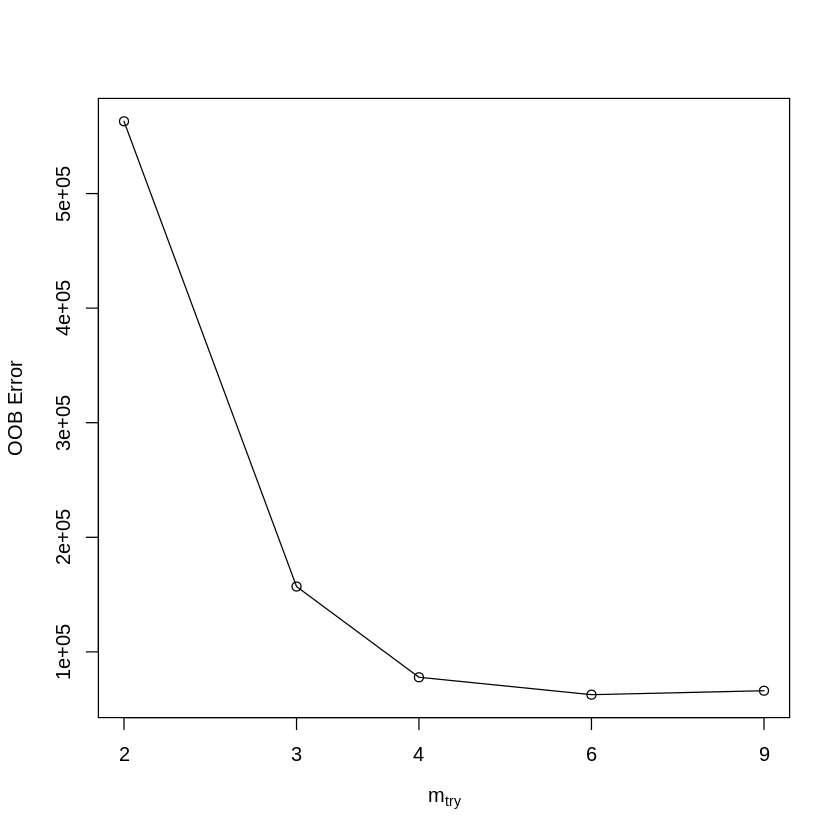

In [17]:
tune_params <- tuneRF(train_predictors, train_target, ntreeTry = 500, stepFactor = 1.5, improve = 0.01, trace = TRUE)

In [18]:
rf_model <- randomForest(price ~ ., data = train_data, ntree = tune_params[1], mtry = tune_params[2])

In [19]:
predictions <- predict(rf_model, newdata = test_predictors)

In [20]:
mse <- mean((test_target - predictions)^2)

In [21]:
print(paste0("Prediction performance: ", round(100 - 100 * mse / var(test_target), 2), "%"))

[1] "Prediction performance: 89.62%"


In [22]:
print(paste0("MSE: ", round(mse, 2)))

[1] "MSE: 510480.09"


In [23]:
rf_model <- randomForest(price ~ ., data = train_data, ntree = tune_params[1], mtry = tune_params[2])

In [24]:
print(importance(rf_model))

             IncNodePurity
room            5610592573
bathroom         123470072
kitchen          195737636
french_door      200516395
backyard         226259881
furnished       2868396138
green_paint      141961431
solar_power     1521867578
woodfloor       2507582310
qlm_security     175282051
club_access      303090407


In [25]:
predictions <- predict(rf_model, newdata = test_data)

In [26]:
print(predictions)

        1         2         3         4         5         6         7         8 
 5021.667  7909.000 10962.179  9176.625 10888.500 10825.405 11927.500  7270.000 
        9        10        11        12        13        14        15        16 
 8064.500  6046.667 10332.333  8480.000  7426.000 11107.418  7677.500  7849.066 
       17        18        19        20        21        22        23        24 
 8813.625 12786.136  9365.444  6205.903  9272.222  7320.000  6169.000  4290.000 
       25        26        27        28        29        30        31        32 
 9307.250  7109.807  6511.000  9040.500  7220.000  9685.000  6315.000  9919.545 
       33        34        35        36        37        38        39        40 
10886.000  9221.667  7730.278 10301.667 10140.278 10433.875  9940.000 10752.333 
       41        42        43        44        45        46        47        48 
 6989.143  5017.750  9355.000  8156.125 10944.704  5895.917  5050.000 11415.265 
       49        50        5

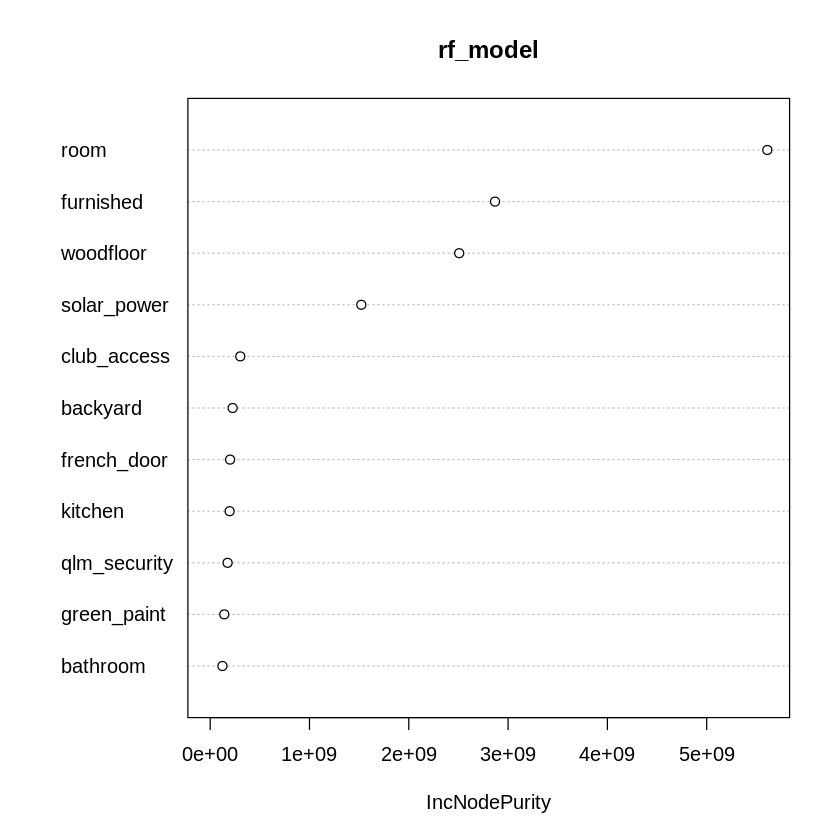

In [27]:
varImpPlot(rf_model)